In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency, ttest_ind, f_oneway


data = pd.read_csv("./widsdatathon2022/train.csv")
test = pd.read_csv("./widsdatathon2022/test.csv")

display(data.info())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(data.nunique())
pd.reset_option('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

None

Year_Factor                      6
State_Factor                     7
building_class                   2
facility_type                   60
floor_area                   20433
year_built                     180
energy_star_rating             101
ELEVATION                      193
january_min_temp                59
january_avg_temp               165
january_max_temp                49
february_min_temp               53
february_avg_temp              168
february_max_temp               43
march_min_temp                  54
march_avg_temp                 166
march_max_temp                  42
april_min_temp                  36
april_avg_temp                 164
april_max_temp                  33
may_min_temp                    35
may_avg_temp                   165
may_max_temp                    39
june_min_temp                   36
june_avg_temp                  162
june_max_temp                   43
july_min_temp                   31
july_avg_temp                  161
july_max_temp       

C:\Users\r2com\AppData\Local\Temp\ipykernel_4812\1436483436.py:19: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\r2com\AppData\Local\Temp\ipykernel_4812\1436483436.py:19: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [2]:
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
data['site_eui_range'] = pd.qcut(data['site_eui'], q=4, labels=labels)

In [3]:
# 월별 기온 데이터 추출
temperature_columns = [col for col in data.columns if col.endswith('_temp')]
avg_columns = [col for col in temperature_columns if col.endswith('_avg_temp')]
min_columns = [col for col in temperature_columns if col.endswith('_min_temp')]
max_columns = [col for col in temperature_columns if col.endswith('_max_temp')]

temperature_data = data.loc[:, ['site_eui', 'site_eui_range'] + temperature_columns]
seasons = ['winter', 'spring', 'summer', 'fall']

# 계절별 기온 데이터 생성
aggs = ['avg', 'min', 'max']
for agg in aggs:
    winter = [f'december_{agg}_temp', f'january_{agg}_temp', f'february_{agg}_temp']
    spring = [f'march_{agg}_temp', f'april_{agg}_temp', f'may_{agg}_temp']
    summer = [f'june_{agg}_temp', f'july_{agg}_temp', f'august_{agg}_temp']
    fall = [f'september_{agg}_temp', f'october_{agg}_temp', f'november_{agg}_temp']

    temperature_data[f'winter_{agg}'] = temperature_data[winter].mean(axis=1)
    temperature_data[f'spring_{agg}'] = temperature_data[spring].mean(axis=1)
    temperature_data[f'summer_{agg}'] = temperature_data[summer].mean(axis=1)
    temperature_data[f'fall_{agg}'] = temperature_data[fall].mean(axis=1)

avg_season_columns = [season+'_avg' for season in seasons]
min_season_columns = [season+'_min' for season in seasons]
max_season_columns = [season+'_max' for season in seasons]

alpha = 0.05

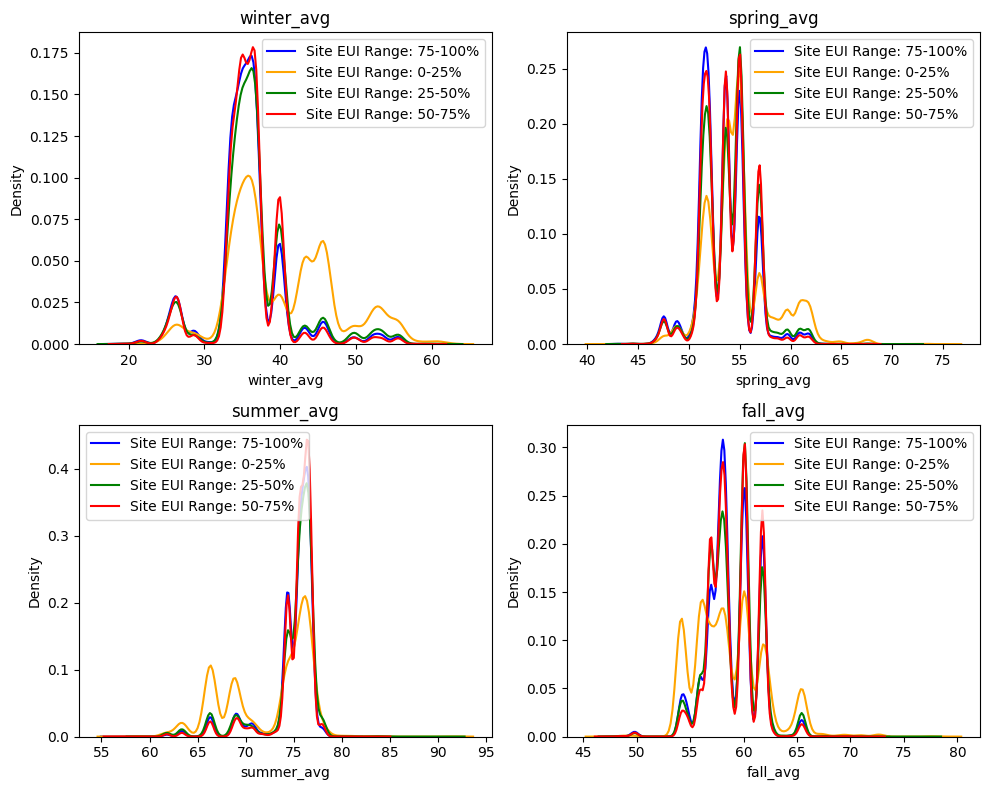

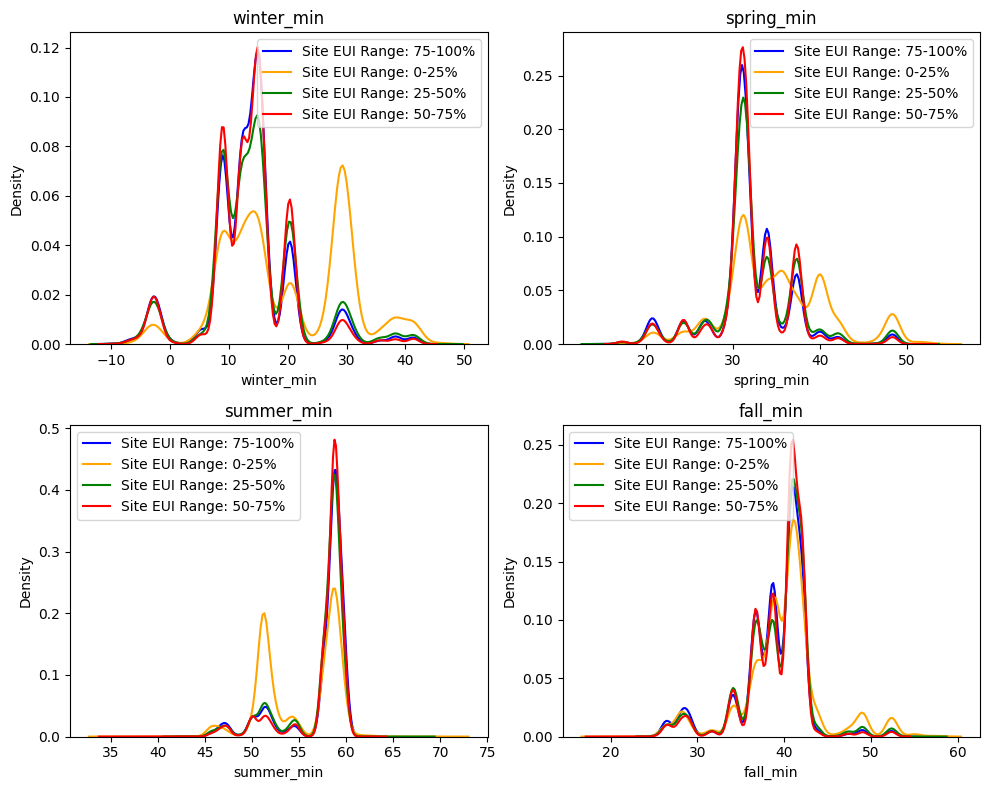

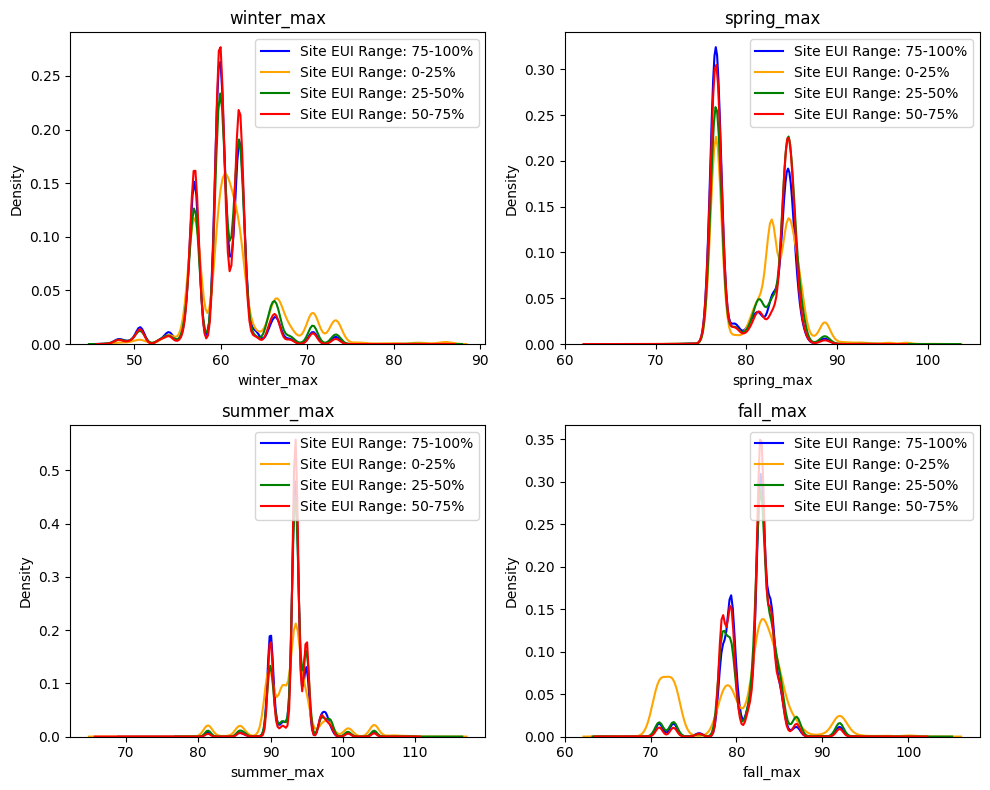

In [4]:
for columns in [avg_season_columns, min_season_columns, max_season_columns]:
    plt.figure(figsize=(10, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i%2+(i//2)*2)
        for site_eui_range, color in zip(temperature_data['site_eui_range'].unique(), ['blue', 'orange', 'green', 'red']):
            sns.kdeplot(data=temperature_data[temperature_data['site_eui_range'] == site_eui_range][col], color=color, 
                        label=f"Site EUI Range: {site_eui_range}", hue_order=labels)
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_

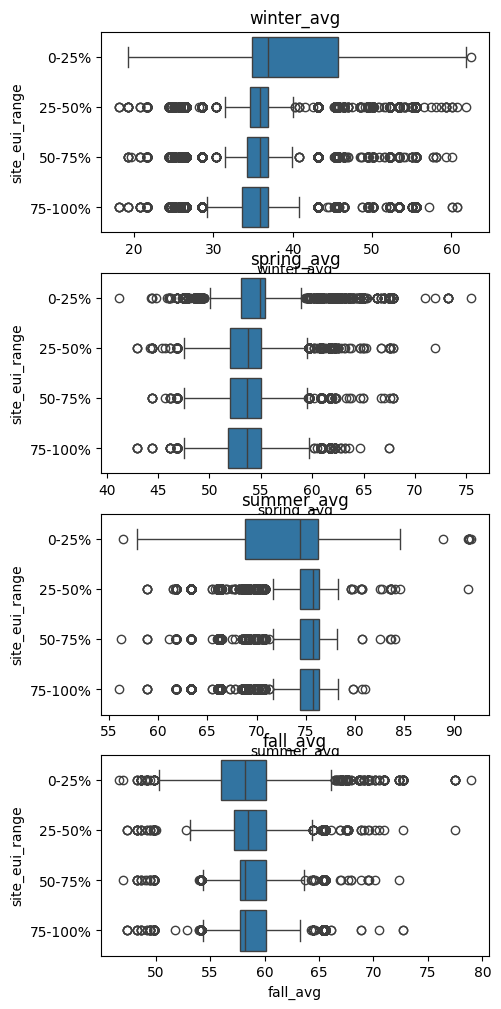

C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_

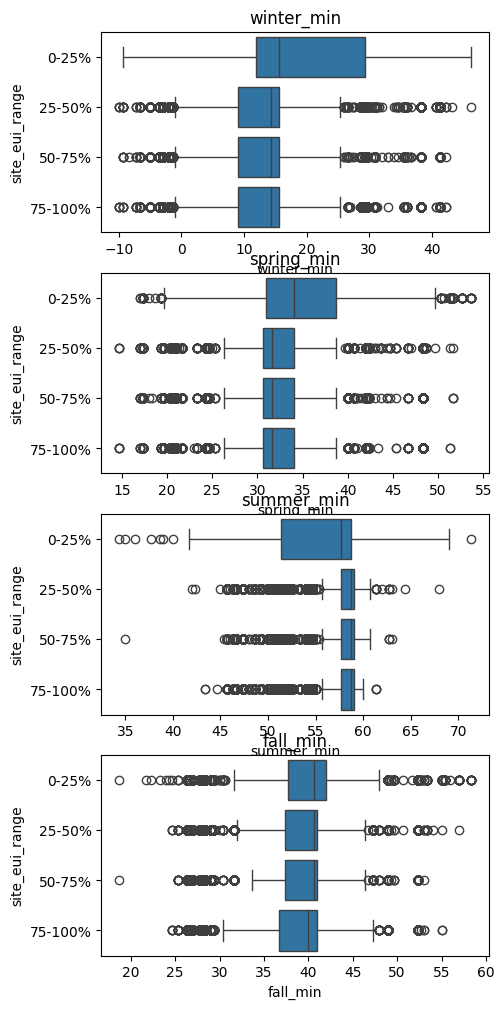

C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\r2com\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_

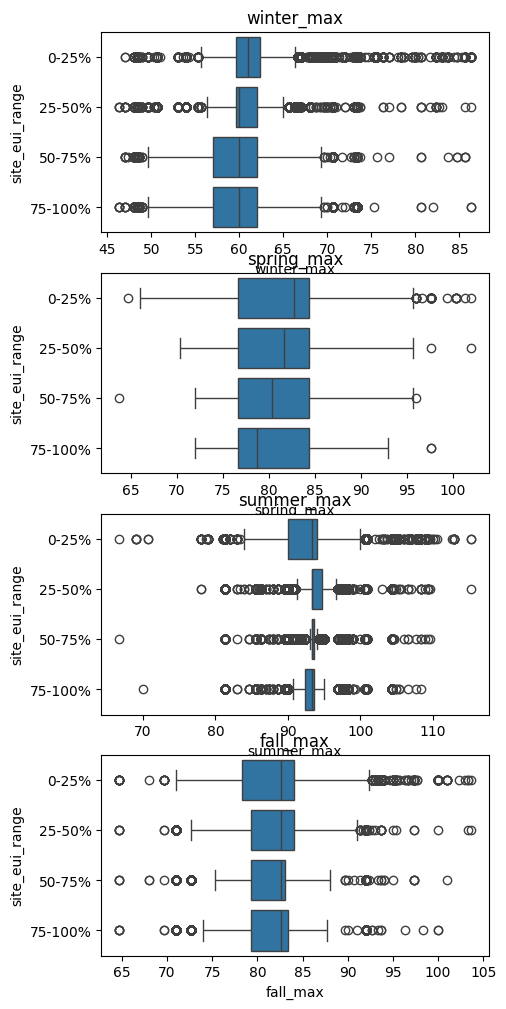

In [5]:
for columns in [avg_season_columns, min_season_columns, max_season_columns]:
    plt.figure(figsize=(5, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 1, i)
        sns.boxplot(data=temperature_data, x=col, y='site_eui_range')
        plt.title(col)
    plt.show()

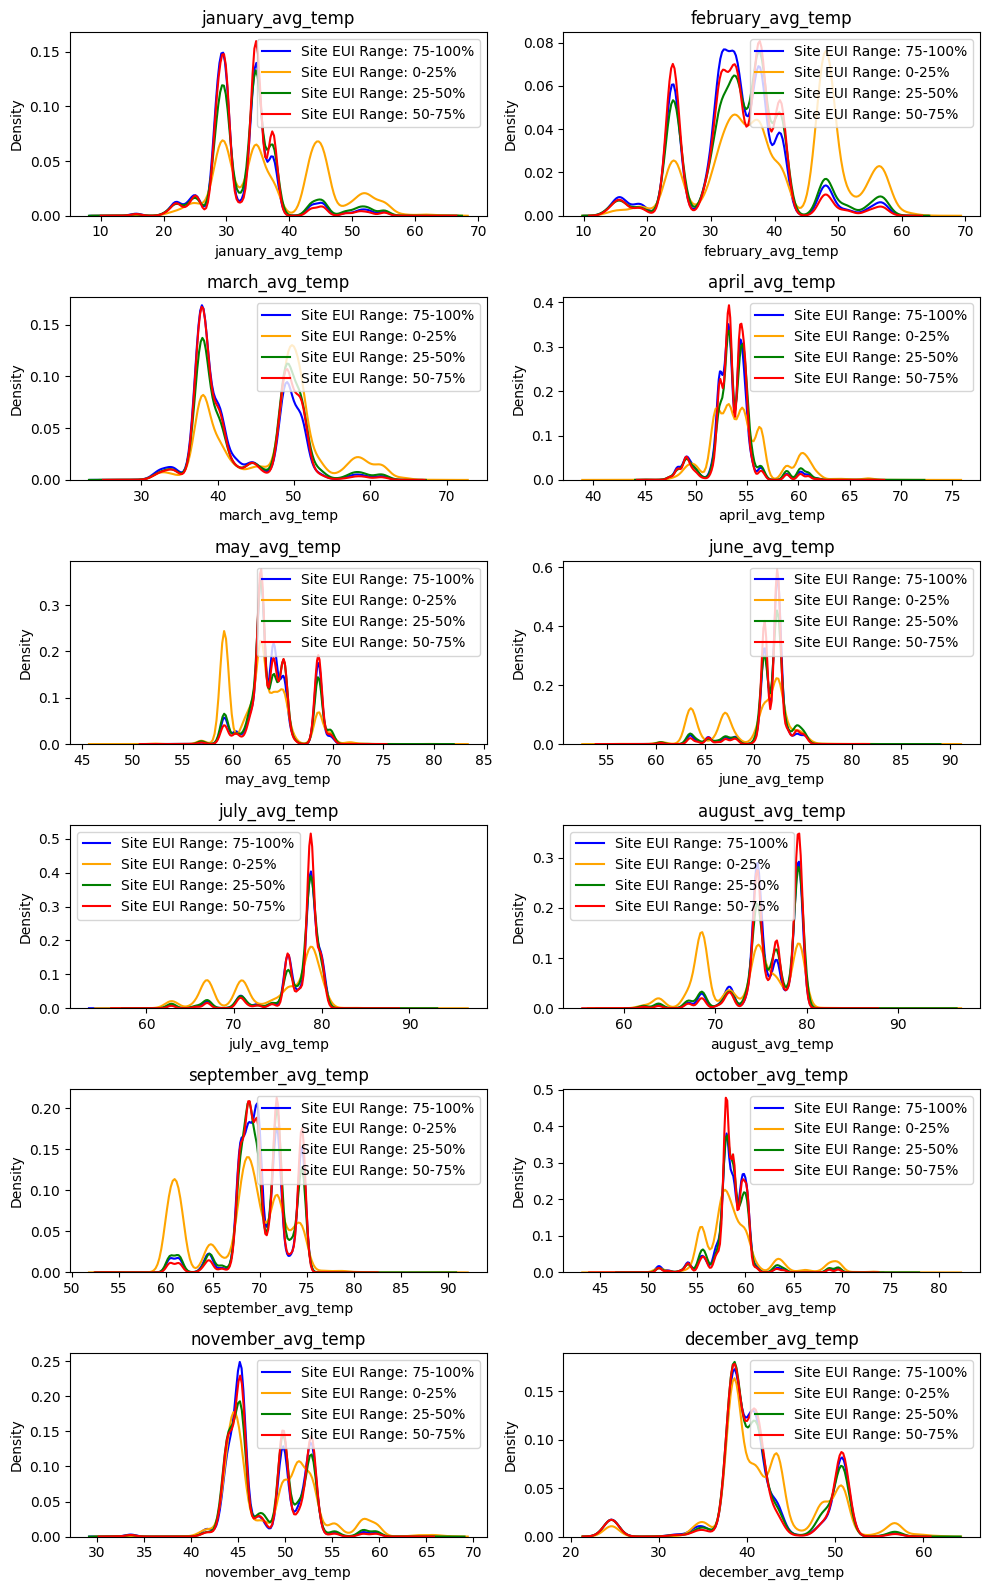

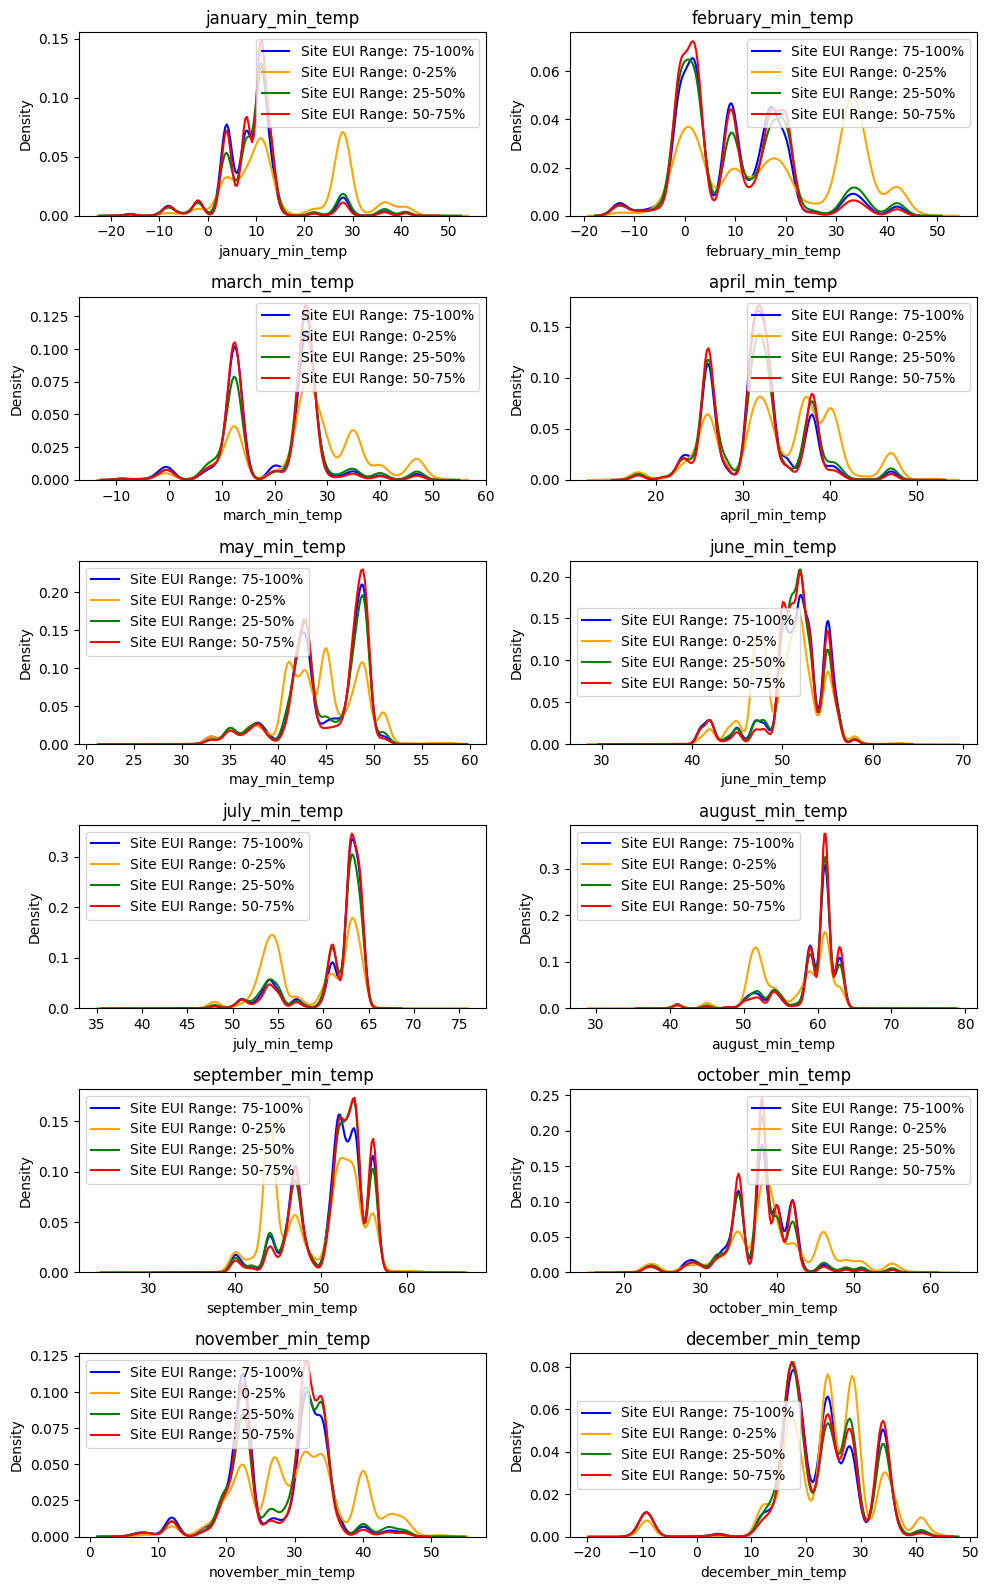

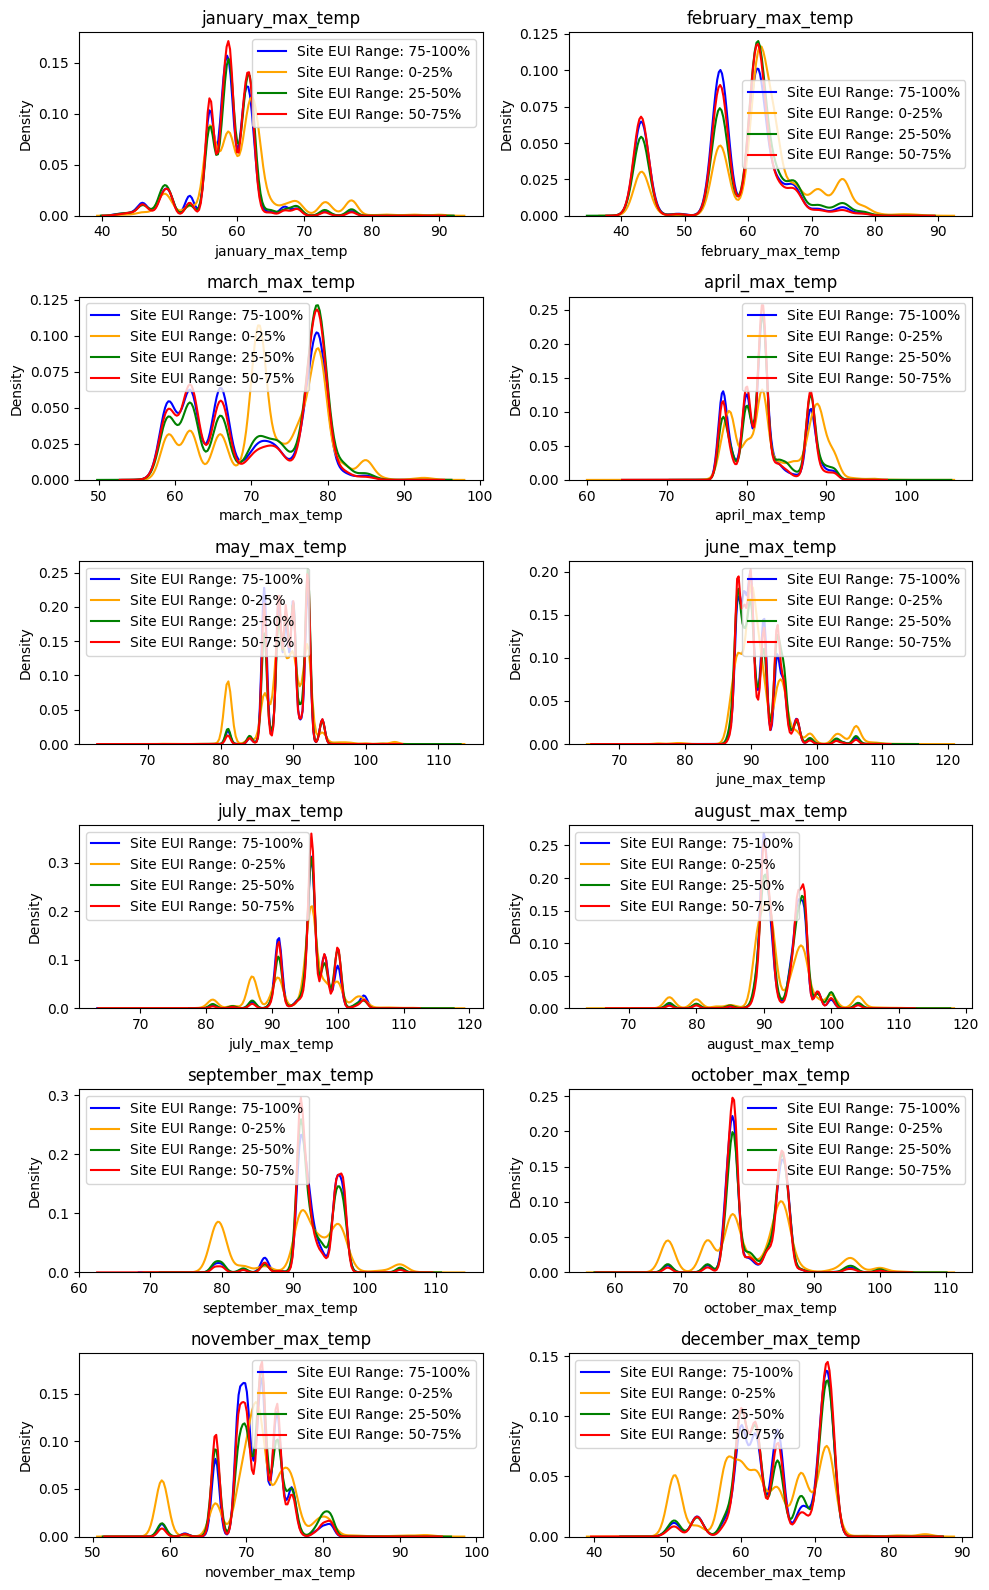

In [6]:
for columns in [avg_columns, min_columns, max_columns]:
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(columns, 1):
        plt.subplot(6, 2, i%2+(i//2)*2)
        for site_eui_range, color in zip(temperature_data['site_eui_range'].unique(), ['blue', 'orange', 'green', 'red']):
            sns.kdeplot(data=temperature_data[temperature_data['site_eui_range'] == site_eui_range][col], color=color, 
                        label=f"Site EUI Range: {site_eui_range}", hue_order=labels)
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()

avg_temp by seasons

T-test Results:
Season winter_avg: t-stat = 18.075146414983987, p-value = 1.148006175149615e-72
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season spring_avg: t-stat = 25.770675097056202, p-value = 2.0810592420089166e-145
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season summer_avg: t-stat = -19.42916972075529, p-value = 9.716421480029653e-84
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season fall_avg: t-stat = -17.162573105308976, p-value = 1.0022937597714836e-65
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.



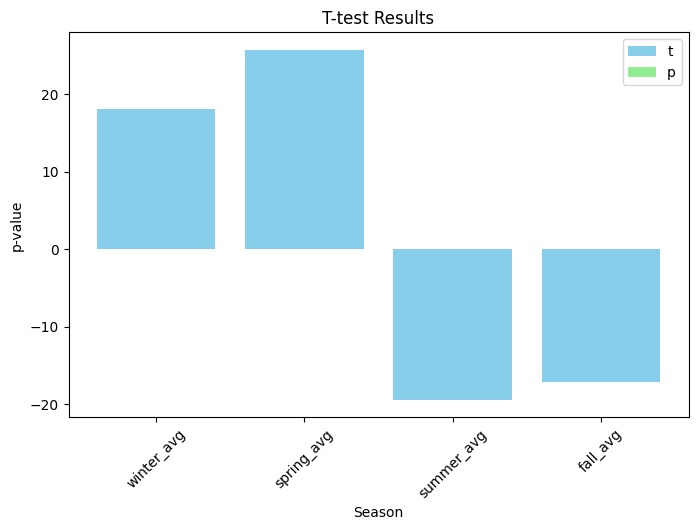

min_temp by seasons

T-test Results:
Season winter_min: t-stat = 12.104913041149315, p-value = 1.1663853324864604e-33
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season spring_min: t-stat = 14.169479680590866, p-value = 1.8386664734246962e-45
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season summer_min: t-stat = -26.763274378848433, p-value = 7.109537719719965e-156
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season fall_min: t-stat = 12.096848111545357, p-value = 1.3004354609705669e-33
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.



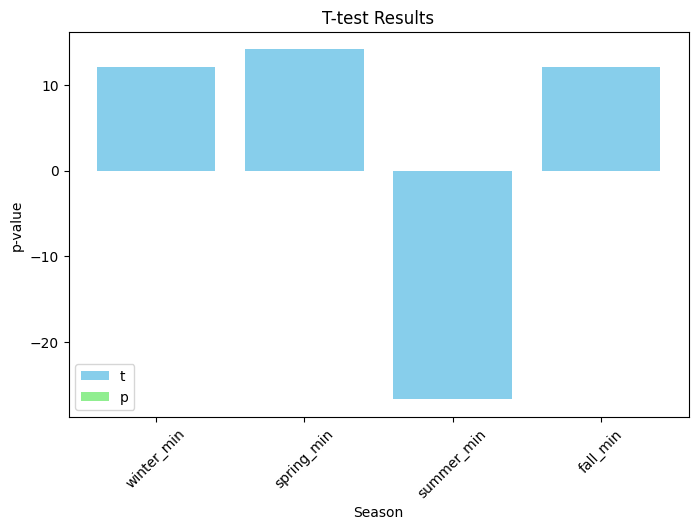

max_temp by seasons

T-test Results:
Season winter_max: t-stat = 12.67128774905732, p-value = 9.50349187401569e-37
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season spring_max: t-stat = 5.714238510746052, p-value = 1.1082615380872398e-08
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season summer_max: t-stat = -18.012945887203365, p-value = 3.3795434903017546e-72
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Season fall_max: t-stat = -11.656690153149826, p-value = 2.334460292589798e-31
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.



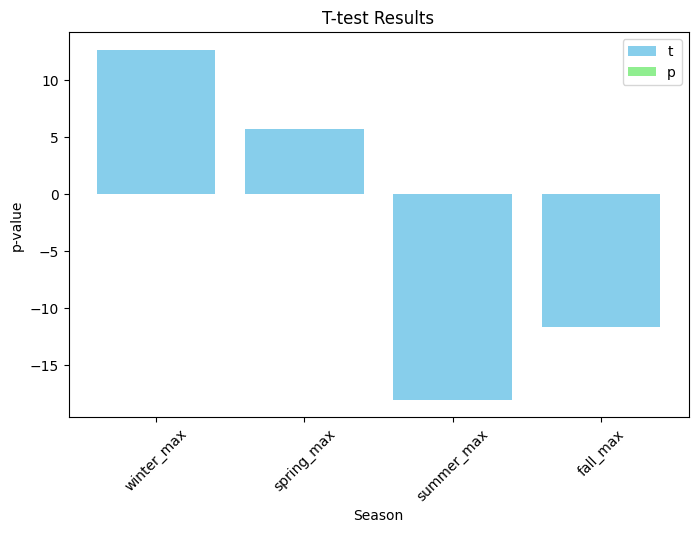

In [7]:
# 각 계절별 기온과 에너지 사용량 사이의 관계를 카이제곱 검정으로 검정
for i, columns in enumerate([avg_season_columns, min_season_columns, max_season_columns]):
    print(f'{aggs[i]}_temp by seasons')

    t_results = {}
    for col in columns:
        under_25 = data[temperature_data[col] <= temperature_data[col].quantile(0.25)]
        over_25 = data[temperature_data[col] > temperature_data[col].quantile(0.25)]
        t, p = ttest_ind(under_25['site_eui'], over_25['site_eui'], equal_var=False)
        t_results[col] = {'t-stat': t, 'p-value': p}
        
    print("\nT-test Results:")
    for season, result in t_results.items():
        print(f"Season {season}: t-stat = {result['t-stat']}, p-value = {result['p-value']}")
        if result['p-value'] < alpha:
            print("귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.\n")
        else:
            print("귀무가설 기각 x: 계절에 따라 에너지 사용량에 유의미한 차이가 없습니다.\n")
    
    # T-test 결과를 그래프로 표현
    t_stat = [result['t-stat'] for result in t_results.values()]
    t_pvalues = [result['p-value'] for result in t_results.values()]
    plt.figure(figsize=(8, 5))
    plt.bar(columns, t_stat, color='skyblue')
    plt.bar(columns, t_pvalues, color='lightgreen')
    plt.legend(['t', 'p'])
    plt.title('T-test Results')
    plt.xlabel('Season')
    plt.ylabel('p-value')
    plt.xticks(rotation=45)
    plt.show()

avg_temp by seasons

T-test Results:
Month january_avg_temp: t-stat = 22.226196864212884, p-value = 1.4030359956790989e-108
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month february_avg_temp: t-stat = 24.334715608246018, p-value = 3.773145951647455e-130
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month march_avg_temp: t-stat = 22.980562262827565, p-value = 2.922272378412144e-116
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month april_avg_temp: t-stat = 6.854177025716496, p-value = 7.304298184576555e-12
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month may_avg_temp: t-stat = -11.615952673578773, p-value = 3.635151923407648e-31
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month june_avg_temp: t-stat = -28.28081178607077, p-value = 3.064517524509914e-174
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month july_avg_temp: t-stat = -21.37621906447529, p-value = 6.783198103561468e-101
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month august_avg_temp: t-stat = -18.199508163069428, p-value = 9.445128081689675e-74
귀무가

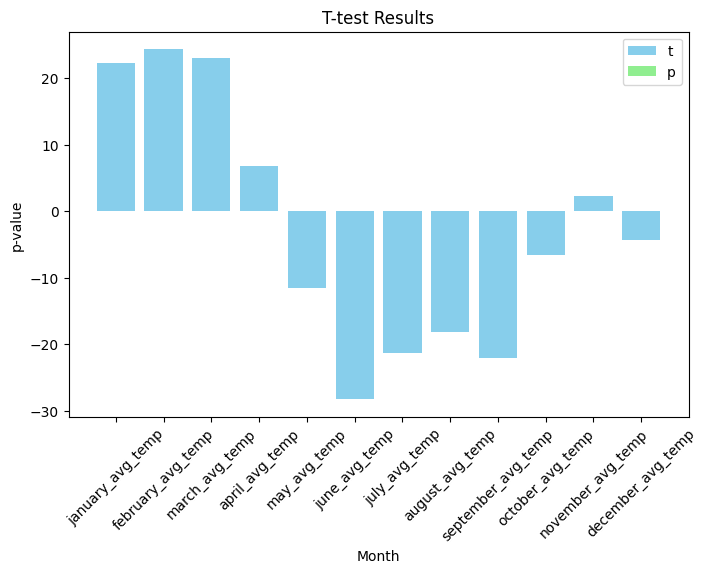

min_temp by seasons

T-test Results:
Month january_min_temp: t-stat = 23.67522589044532, p-value = 9.142623737881469e-123
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month february_min_temp: t-stat = 16.50871508360765, p-value = 4.149678847831709e-61
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month march_min_temp: t-stat = 23.553982817928933, p-value = 3.910988542366454e-122
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month april_min_temp: t-stat = 9.214817879845608, p-value = 3.29408633035934e-20
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month may_min_temp: t-stat = -0.013690751152664304, p-value = 0.9890767802237879
귀무가설 기각 x: 계절에 따라 에너지 사용량에 유의미한 차이가 없습니다.

Month june_min_temp: t-stat = -14.211831882477496, p-value = 9.555952961806886e-46
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month july_min_temp: t-stat = -27.02410589831296, p-value = 8.270687841018052e-159
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month august_min_temp: t-stat = -27.060292972755917, p-value = 2.383386591374397e-159
귀무가설 기

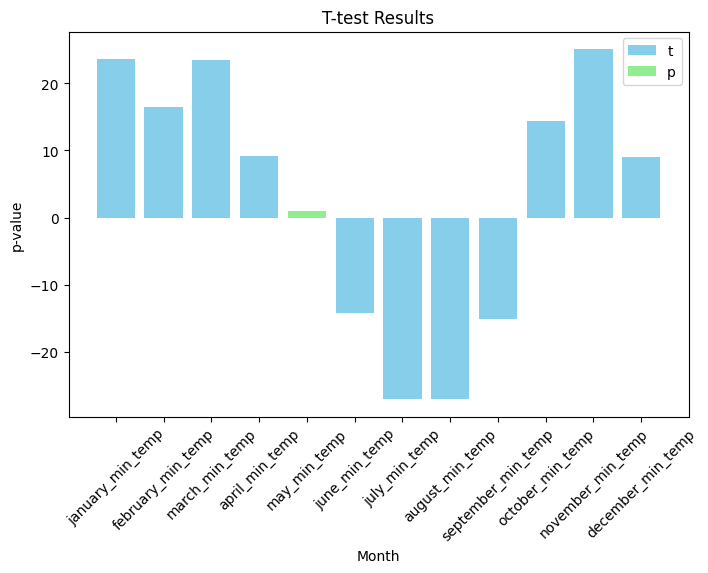

max_temp by seasons

T-test Results:
Month january_max_temp: t-stat = 5.072142666515068, p-value = 3.9516729720294385e-07
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month february_max_temp: t-stat = 19.935707555375693, p-value = 5.265258497606014e-88
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month march_max_temp: t-stat = 16.219792708263167, p-value = 5.794918285765595e-59
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month april_max_temp: t-stat = 8.699142847625316, p-value = 3.435690832304976e-18
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month may_max_temp: t-stat = -5.957786919612443, p-value = 2.569628532674295e-09
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month june_max_temp: t-stat = 8.342917255335848, p-value = 7.416429327485809e-17
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month july_max_temp: t-stat = -4.284745239815375, p-value = 1.8342000737645566e-05
귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.

Month august_max_temp: t-stat = 1.1440325890342742, p-value = 0.2526153274956554
귀무가설 기각 x: 계절에

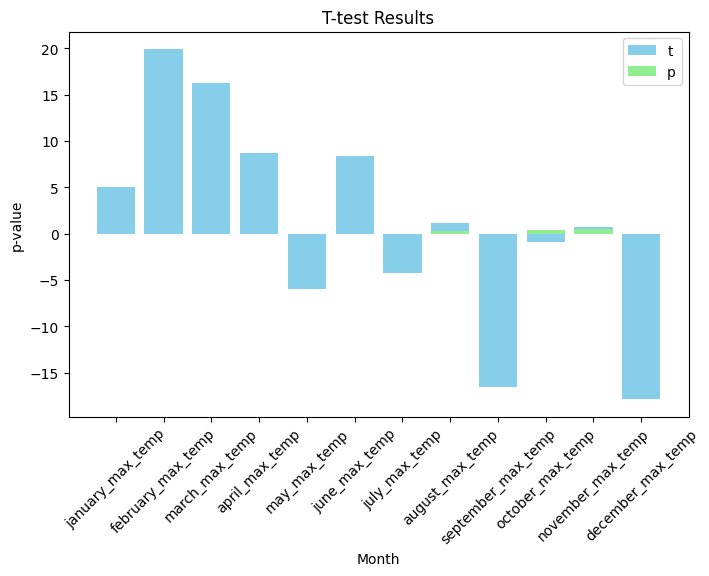

In [36]:
# 월별 기온과 에너지 사용량 사이의 관계를 카이제곱 검정으로 검정
for i, columns in enumerate([avg_columns, min_columns, max_columns]):
    print(f'{aggs[i]}_temp by seasons')

    t_results = {}
    for col in columns:
        under_25 = data[temperature_data[col] <= temperature_data[col].quantile(0.25)]
        over_25 = data[temperature_data[col] > temperature_data[col].quantile(0.25)]
        t, p = ttest_ind(under_25['site_eui'], over_25['site_eui'], equal_var=False)
        t_results[col] = {'t-stat': t, 'p-value': p}
        
    print("\nT-test Results:")
    for month, result in t_results.items():
        print(f"Month {month}: t-stat = {result['t-stat']}, p-value = {result['p-value']}")
        if result['p-value'] < alpha:
            print("귀무가설 기각: 계절에 따라 에너지 사용량에 유의미한 차이가 있습니다.\n")
        else:
            print("귀무가설 기각 x: 계절에 따라 에너지 사용량에 유의미한 차이가 없습니다.\n")
    
    # T-test 결과를 그래프로 표현
    t_stat = [result['t-stat'] for result in t_results.values()]
    t_pvalues = [result['p-value'] for result in t_results.values()]
    plt.figure(figsize=(8, 5))
    plt.bar(columns, t_stat, color='skyblue')
    plt.bar(columns, t_pvalues, color='lightgreen')
    plt.legend(['t', 'p'])
    plt.title('T-test Results')
    plt.xlabel('Month')
    plt.ylabel('p-value')
    plt.xticks(rotation=45)
    plt.show()